**Import Libraries & dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
df= pd.read_csv("pd_speech_features.csv")

**Data Preprocessing**

In [ ]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,197,0,0.84948,0.70178,0.25946,362,361,0.005320,0.000025,0.00060,...,11.9630,10.1855,4.9705,2.3381,2.7773,3.5032,4.4156,4.5029,4.2474,1.0
593,197,0,0.83045,0.71832,0.26936,379,378,0.005089,0.000030,0.00065,...,2.9116,3.3778,2.8492,3.0232,2.7581,3.1681,3.9787,4.8948,3.5699,1.0
594,198,1,0.75638,0.70234,0.61218,283,282,0.006829,0.000032,0.00126,...,2.5011,2.9637,2.5929,2.8043,1.8700,1.6933,1.9482,3.7304,11.2957,0.0
595,198,1,0.39336,0.67172,0.72706,370,366,0.005110,0.002452,0.00234,...,3.0564,3.0239,3.0174,2.8764,2.3192,2.0518,2.5146,3.7603,3.5972,0.0


In [ ]:
df.info()  # Vérifier les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Columns: 755 entries, id to class
dtypes: float64(750), int64(5)
memory usage: 3.4 MB


In [ ]:
df.isnull().sum()  # Vérifier les valeurs manquantes

,0
id,0
gender,0
PPE,0
DFA,0
RPDE,0
...,...
tqwt_kurtosisValue_dec_33,1
tqwt_kurtosisValue_dec_34,1
tqwt_kurtosisValue_dec_35,1
tqwt_kurtosisValue_dec_36,1


In [ ]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,...,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,99.000000,0.547739,0.743928,0.699567,0.492398,322.043551,320.762144,0.006429,0.000401,0.002411,...,25.183601,22.392119,18.892698,14.272159,12.491529,12.721852,15.086392,14.951157,31.871954,0.765101
std,57.493799,0.498133,0.168592,0.071655,0.137237,101.516710,101.621289,0.001861,0.000759,0.002667,...,41.649278,32.284514,25.690977,20.480072,18.036664,16.554110,15.870459,14.497775,34.502323,0.424292
min,0.000000,0.000000,0.041551,0.545320,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.520400,1.531700,1.582900,1.747200,1.834900,1.628700,1.861700,1.955900,2.364000,0.000000
25%,49.000000,0.000000,0.758720,0.642560,0.388520,250.000000,249.000000,0.005085,0.000052,0.001020,...,2.395825,3.452800,3.335425,3.067775,2.919300,3.108125,3.673825,3.768175,3.887600,1.000000
50%,99.000000,1.000000,0.809730,0.696460,0.491230,310.000000,309.000000,0.006200,0.000079,0.001590,...,5.457850,7.097000,6.093150,4.861750,4.254700,4.788450,6.913600,7.661650,10.179150,1.000000
75%,149.000000,1.000000,0.833470,0.757560,0.590890,378.000000,377.000000,0.007639,0.000174,0.002630,...,23.158175,27.080400,22.783375,14.079275,11.640600,12.973375,22.834075,23.033800,62.162125,1.000000
max,198.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,212.223400,158.979100,121.256900,102.207000,85.571700,73.241700,62.007300,57.544300,156.423700,1.000000


In [ ]:
#Find Identical columns
def identicalcols(df):
    identical_cols = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                identical_cols.append((cols[i], cols[j]))
    return identical_cols

duplicates = identicalcols(df)

if duplicates:
    print("Identical columns:")
    for pair in duplicates:
        print(f"{pair[0]} == {pair[1]}")
else:
    print("No identical columns.")

No identical columns.


**Correlation Matrix**

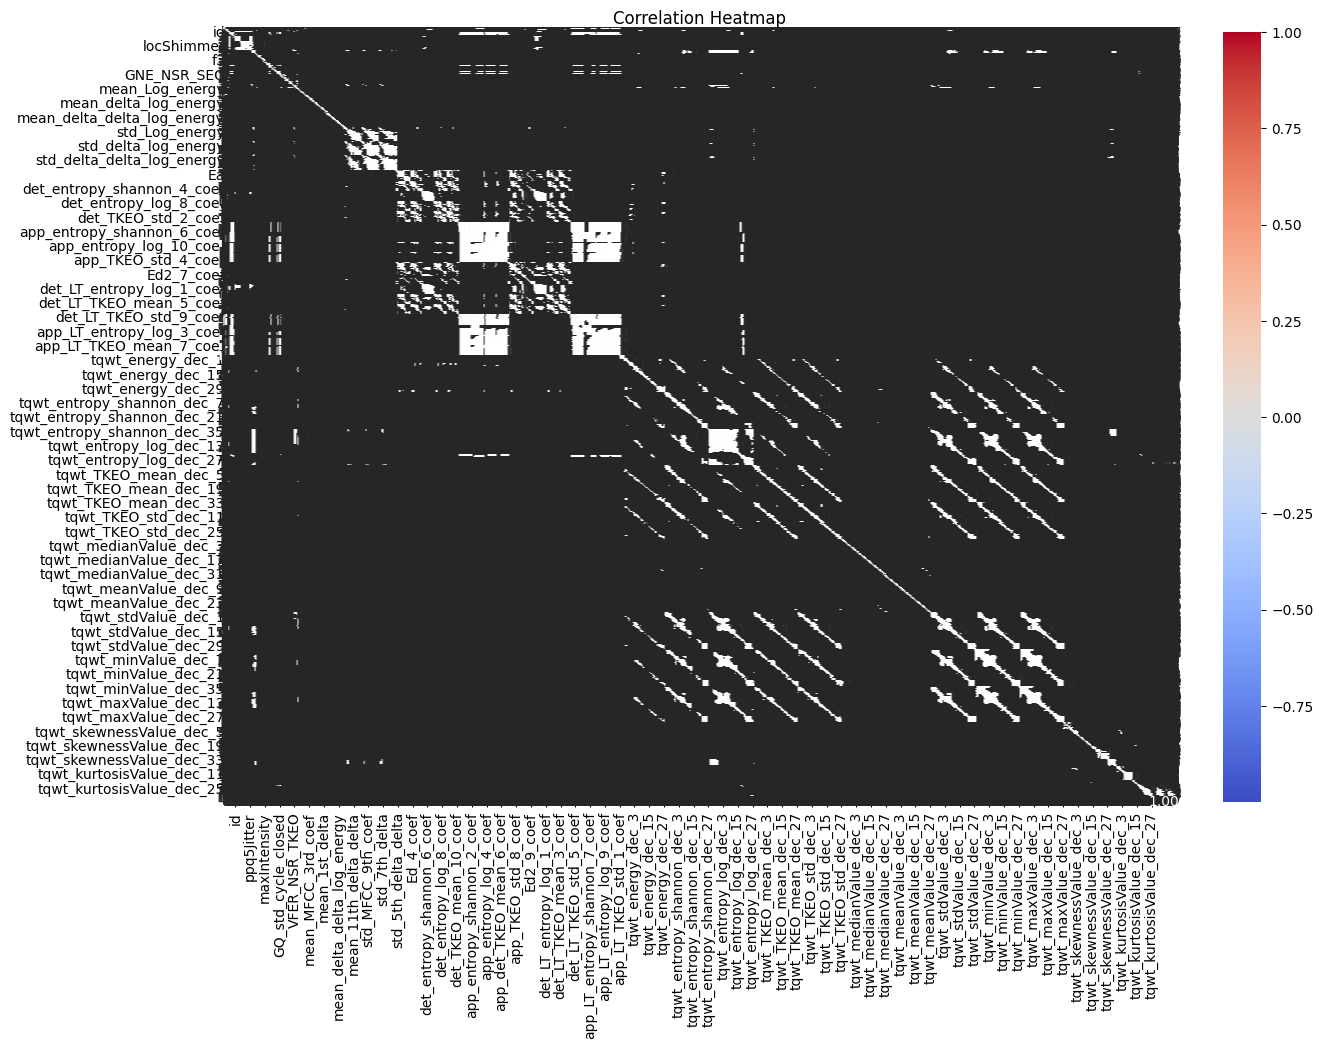

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlated_data = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlated_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Cassical Models**

### **SVC (RBF)**

In [ ]:
X = df.iloc[:, :-1].values   # 775 features
y = df.iloc[:, -1].values    # target labels

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# 2. Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),                       # Normalize features
    ("pca", PCA(n_components=32)),                      # Reduce further to 30 components
    ("classifier", SVC(kernel="rbf", C=5, gamma="scale")) # SVM classifier
])

In [ ]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 4. Fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=32)),
                ('classifier', SVC(C=1))])

In [ ]:
# 5. Evaluate model
accuracy = pipeline.score(X_train, y_train)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.90


In [ ]:
accuracy = pipeline.score(X_test, y_test)
cv_scores = cross_val_score(pipeline, X, y, cv=5)

print("Test Accuracy:", accuracy)
print("Cross-validation Accuracy:", np.mean(cv_scores))

Test Accuracy: 0.8223684210526315
Cross-validation Accuracy: 0.8413210177762286


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.83      0.96      0.89       113

    accuracy                           0.82       152
   macro avg       0.81      0.69      0.72       152
weighted avg       0.82      0.82      0.80       152



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 16  23]
 [  4 109]]


## **Logistic Regression**

Train Accuracy: 0.9668874172185431
Test Accuracy: 0.8157894736842105

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65        39
           1       0.88      0.87      0.88       113

    accuracy                           0.82       152
   macro avg       0.76      0.77      0.76       152
weighted avg       0.82      0.82      0.82       152


Confusion Matrix:
 [[26 13]
 [15 98]]


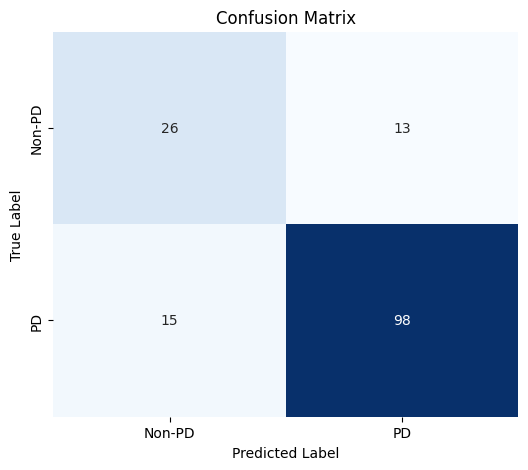

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)), # keep 95% of variance
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the pipeline
pipeline.fit(X_train, y_train)
print("Train Accuracy:", pipeline.score(X_train, y_train))

# Evaluate again
y_pred = pipeline.predict(X_test)

print("Test Accuracy:", pipeline.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Non-PD", "PD"],
            yticklabels=["Non-PD", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before:", pd.Series(y_train).value_counts())
print("After:", pd.Series(y_train_balanced).value_counts())

Before: 1    452
0    152
Name: count, dtype: int64
After: 1    452
0    452
Name: count, dtype: int64


In [ ]:
mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=7)
mlp.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=7)

In [ ]:
training_accuracy = mlp.score(X_train_balanced, y_train_balanced)

print(f"Train Accuracy: {training_accuracy:.2f}")

Train Accuracy: 0.97


In [ ]:
y_pred = mlp.predict(X_test_scaled)

testing_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)

print(f"Test Accuracy: {testing_accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66        40
           1       0.88      0.88      0.88       112

    accuracy                           0.82       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.82      0.82      0.82       152

Confusion Matrix:
[[26 14]
 [13 99]]


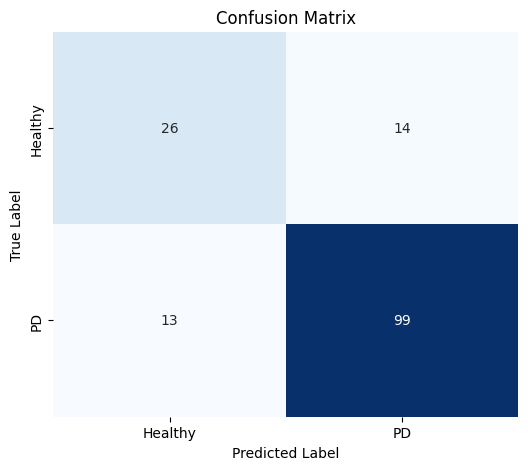

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Healthy", "PD"],
            yticklabels=["Healthy", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

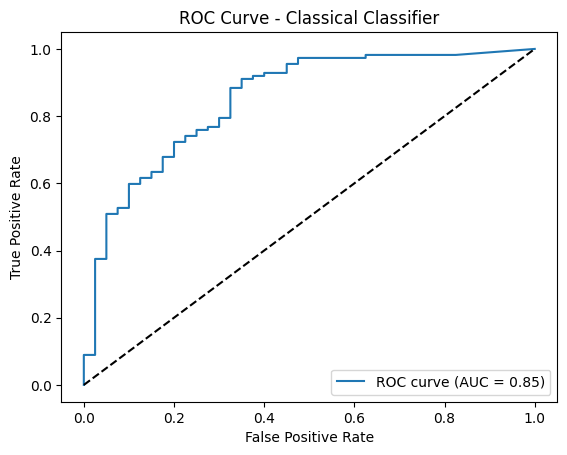

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = mlp.predict_proba(X_test_scaled)[:, 1]   # predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classical Classifier")
plt.legend()
plt.show()

In [ ]:
# --- Train Predictions ---
y_train_pred = mlp.predict(X_train_balanced)   # or X_train_scaled if not resampled

train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_sensitivity = recall_score(y_train_balanced, y_train_pred)  # recall = sensitivity
train_precision = precision_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)

# --- Test Predictions ---
y_test_pred = mlp.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_sensitivity = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("=== Train Metrics ===")
print(f"Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Precision: {train_precision:.2f}, F1: {train_f1:.2f}")

print("\n=== Test Metrics ===")
print(f"Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Precision: {test_precision:.2f}, F1: {test_f1:.2f}")

=== Train Metrics ===
Accuracy: 0.97, Sensitivity: 0.97, Precision: 0.98, F1: 0.97

=== Test Metrics ===
Accuracy: 0.82, Sensitivity: 0.88, Precision: 0.88, F1: 0.88


# **CatBoost**

In [ ]:
!pip install catboost
!pip install imbalanced-learn

In [ ]:
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before:", pd.Series(y_train).value_counts())
print("After:", pd.Series(y_train_balanced).value_counts())

Before: 1    450
0    154
Name: count, dtype: int64
After: 1    450
0    450
Name: count, dtype: int64


In [ ]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.01,
    depth=6,
    verbose=0
)

model.fit(X_train_balanced, y_train_balanced)

In [ ]:
accuracy = model.score(X_train_balanced, y_train_balanced)

print(f"Train Accuracy: {accuracy:.2f}")

Train Accuracy: 0.96


In [ ]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test , y_pred)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.83


In [ ]:
class_report = classification_report(y_test , y_pred)
print("Classification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        38
           1       0.89      0.88      0.88       114

    accuracy                           0.83       152
   macro avg       0.77      0.78      0.78       152
weighted avg       0.83      0.83      0.83       152

Confusion Matrix:
[[ 26  12]
 [ 14 100]]


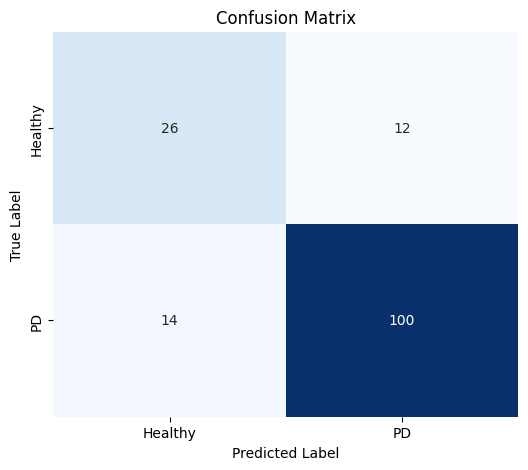

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Healthy", "PD"],
            yticklabels=["Healthy", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

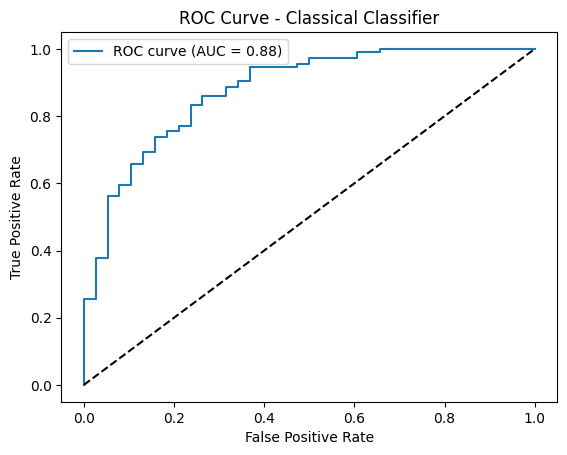

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test_scaled)[:, 1]   # predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classical Classifier")
plt.legend()
plt.show()

In [ ]:
# --- Train Predictions ---
y_train_pred = model.predict(X_train_balanced)   # or X_train_scaled if not resampled

train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_sensitivity = recall_score(y_train_balanced, y_train_pred)  # recall = sensitivity
train_precision = precision_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)

# --- Test Predictions ---
y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_sensitivity = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("=== Train Metrics ===")
print(f"Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Precision: {train_precision:.2f}, F1: {train_f1:.2f}")

print("\n=== Test Metrics ===")
print(f"Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Precision: {test_precision:.2f}, F1: {test_f1:.2f}")

=== Train Metrics ===
Accuracy: 0.96, Sensitivity: 0.96, Precision: 0.96, F1: 0.96

=== Test Metrics ===
Accuracy: 0.83, Sensitivity: 0.88, Precision: 0.89, F1: 0.88


# **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before:", pd.Series(y_train).value_counts())
print("After:", pd.Series(y_train_balanced).value_counts())

Before: 1    452
0    152
Name: count, dtype: int64
After: 1    452
0    452
Name: count, dtype: int64


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=7)

rf_classifier.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=7)

In [ ]:
training_accuracy = rf_classifier.score(X_train_balanced, y_train_balanced)

print(f"Train Accuracy: {training_accuracy:.2f}")

Train Accuracy: 1.00


In [ ]:
y_pred = rf_classifier.predict(X_test_scaled)

testing_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)

print(f"Test Accuracy: {testing_accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68        40
           1       0.87      0.94      0.90       112

    accuracy                           0.85       152
   macro avg       0.82      0.77      0.79       152
weighted avg       0.84      0.85      0.84       152

Confusion Matrix:
[[ 24  16]
 [  7 105]]


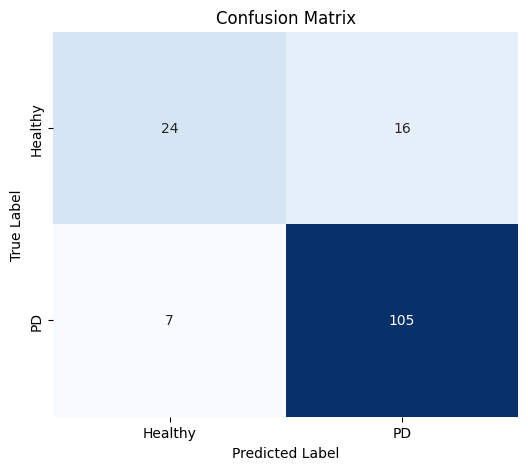

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Healthy", "PD"],
            yticklabels=["Healthy", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

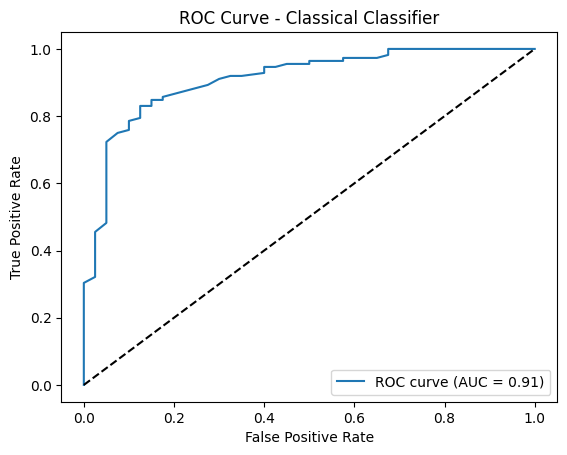

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = rf_classifier.predict_proba(X_test_scaled)[:, 1]   # predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classical Classifier")
plt.legend()
plt.show()

In [ ]:
# --- Train Predictions ---
y_train_pred = rf_classifier.predict(X_train_balanced)   # or X_train_scaled if not resampled

train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_sensitivity = recall_score(y_train_balanced, y_train_pred)  # recall = sensitivity
train_precision = precision_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)

# --- Test Predictions ---
y_test_pred = rf_classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_sensitivity = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("=== Train Metrics ===")
print(f"Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Precision: {train_precision:.2f}, F1: {train_f1:.2f}")

print("\n=== Test Metrics ===")
print(f"Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Precision: {test_precision:.2f}, F1: {test_f1:.2f}")

=== Train Metrics ===
Accuracy: 1.00, Sensitivity: 1.00, Precision: 1.00, F1: 1.00

=== Test Metrics ===
Accuracy: 0.85, Sensitivity: 0.94, Precision: 0.87, F1: 0.90


# **XGBOOST**

In [ ]:
import xgboost as xgb

df = pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Before:", pd.Series(y_train).value_counts())
print("After:", pd.Series(y_train_balanced).value_counts())


Before: 1    450
0    154
Name: count, dtype: int64
After: 1    450
0    450
Name: count, dtype: int64


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
training_accuracy = model.score(X_train_balanced, y_train_balanced)

print(f"Train Accuracy: {training_accuracy:.2f}")

Train Accuracy: 1.00


In [ ]:
y_pred = model.predict(X_test_scaled)

testing_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)

print(f"Test Accuracy: {testing_accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.91      0.94      0.92       114

    accuracy                           0.88       152
   macro avg       0.85      0.82      0.84       152
weighted avg       0.88      0.88      0.88       152

Confusion Matrix:
[[ 27  11]
 [  7 107]]


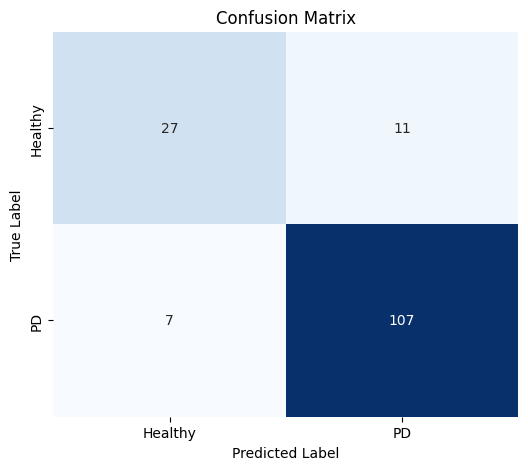

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Healthy", "PD"],
            yticklabels=["Healthy", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

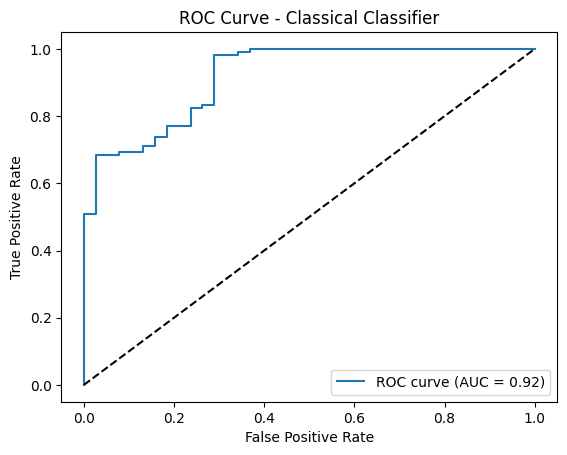

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test_scaled)[:, 1]   # predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Classical Classifier")
plt.legend()
plt.show()

In [ ]:
# --- Train Predictions ---
y_train_pred = model.predict(X_train_balanced)   # or X_train_scaled if not resampled

train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_sensitivity = recall_score(y_train_balanced, y_train_pred)  # recall = sensitivity
train_precision = precision_score(y_train_balanced, y_train_pred)
train_f1 = f1_score(y_train_balanced, y_train_pred)

# --- Test Predictions ---
y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_sensitivity = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("=== Train Metrics ===")
print(f"Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Precision: {train_precision:.2f}, F1: {train_f1:.2f}")

print("\n=== Test Metrics ===")
print(f"Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Precision: {test_precision:.2f}, F1: {test_f1:.2f}")

=== Train Metrics ===
Accuracy: 1.00, Sensitivity: 1.00, Precision: 1.00, F1: 1.00

=== Test Metrics ===
Accuracy: 0.88, Sensitivity: 0.94, Precision: 0.91, F1: 0.92


# **Quantum Model**

In [ ]:
!pip install pennylane
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import pennylane as qml

df= pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Preprocess: Scale → SelectKBest → PCA
scaler = MinMaxScaler().fit(X_train_balanced)

X_train_s = scaler.transform(X_train_balanced)
X_test_s  = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=100).fit(X_train_s, y_train_balanced)

X_train_k = selector.transform(X_train_s)
X_test_k  = selector.transform(X_test_s)

pca = PCA(n_components=4, random_state=42).fit(X_train_k)
X_train_pca = pca.transform(X_train_k)
X_test_pca  = pca.transform(X_test_k)

**ZZFeature + StronglyEntanglingLayers**

In [ ]:
# --- Quantum Circuit ---
dev = qml.device("lightning.qubit", wires=4)
n_qubits = 4


# Removed @qml.qnode(dev) decorator
def zz_feature_map(x):
    # x is a feature vector
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ((np.pi - x[i]) * (np.pi - x[i+1]), wires=i+1)
        qml.CNOT(wires=[i, i+1])

def variational_block(params):
    qml.StronglyEntanglingLayers(weights=params, wires=range(4))

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    zz_feature_map(inputs)
    variational_block(weights)
    # Measure all qubits instead of just one
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

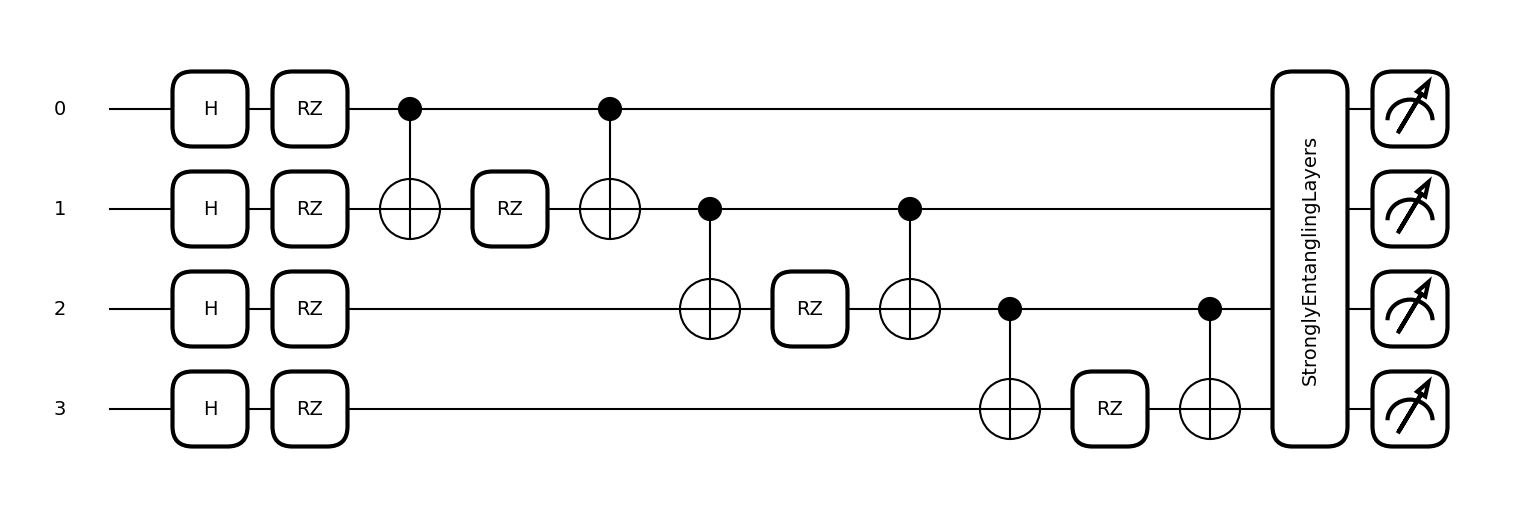

In [ ]:
qml.drawer.use_style("black_white")
# Add dummy inputs and weights for drawing the circuit
inputs = np.zeros(4)
shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=4)
weights = np.random.random(size=shape)
fig, ax = qml.draw_mpl(qnode)(inputs, weights)
plt.show()

In [ ]:
N_QUBITS = 4                    # qubits = PCA_DIM
LAYERS = 4                      # variational layers
EPOCHS = 50                     # training epochs
BATCH_SIZE = 32
LR = 0.005

# Torch Module wrapping the QNode
# --- Torch Module ---
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(LAYERS, N_QUBITS, 3, dtype=torch.float64))
        # Instead of just bias+scale, use a Linear layer to combine all qubit outputs
        self.fc = nn.Linear(N_QUBITS, 1, dtype=torch.float64)

    def forward(self, x_batch):
        outs = []
        for x in x_batch:
            expvals = qnode(x, self.weights)  # shape (N_QUBITS,)
            outs.append(torch.tensor(expvals, dtype=torch.float64))
        outs = torch.stack(outs)  # shape (B, N_QUBITS)
        logits = self.fc(outs)    # shape (B, 1)
        probs = torch.sigmoid(logits)
        return probs.view(-1)

model = QuantumClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.BCELoss()


# Torch Datasets

X_train_t = torch.tensor(X_train_pca, dtype=torch.float64)
y_train_t = torch.tensor(y_train_balanced, dtype=torch.float64)
X_test_t  = torch.tensor(X_test_pca, dtype=torch.float64)
y_test_t  = torch.tensor(y_test, dtype=torch.float64)


train_ds = torch.utils.data.TensorDataset(X_train_t, y_train_t)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)


# Train

for epoch in range(1, EPOCHS+1):
    model.train()
    losses = []
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d}/{EPOCHS} | Loss: {np.mean(losses):.4f}")


# Evaluate

model.eval()
with torch.no_grad():
    p_train = model(X_train_t).numpy()
    p_test  = model(X_test_t).numpy()

yhat_train = (p_train >= 0.5).astype(int)
yhat_test  = (p_test  >= 0.5).astype(int)

print("\n=== Quantum Model Performance ===")
print("Train Acc :", accuracy_score(y_train_balanced, yhat_train))
print("Test  Acc :", accuracy_score(y_test, yhat_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, yhat_test, target_names=["Healthy","PD"]))

# Confusion Matrix
cm = confusion_matrix(y_test, yhat_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","PD"])
disp.plot(values_format="d")
plt.title("Quantum Classifier – Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("\n=== Quantum Model Performance ===")
print("Train Acc :", accuracy_score(y_train_balanced, yhat_train))
print("Test  Acc :", accuracy_score(y_test, yhat_test))
print("Precision:", precision_score(y_test, yhat_test))
print("Recall   :", recall_score(y_test, yhat_test))
print("F1 Score :", f1_score(y_test, yhat_test))

**ZZFeature + BasicEntanglingLayers**

In [ ]:
# --- Quantum Circuit ---
dev = qml.device("lightning.qubit", wires=4)
n_qubits = 4


# Removed @qml.qnode(dev) decorator
def zz_feature_map(x):
    # x is a feature vector
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ((np.pi - x[i]) * (np.pi - x[i+1]), wires=i+1)
        qml.CNOT(wires=[i, i+1])

def variational_block(params):
    qml.templates.BasicEntanglerLayers(weights=params, wires=range(4))

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    zz_feature_map(inputs)
    variational_block(weights)
    # Measure all qubits instead of just one
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

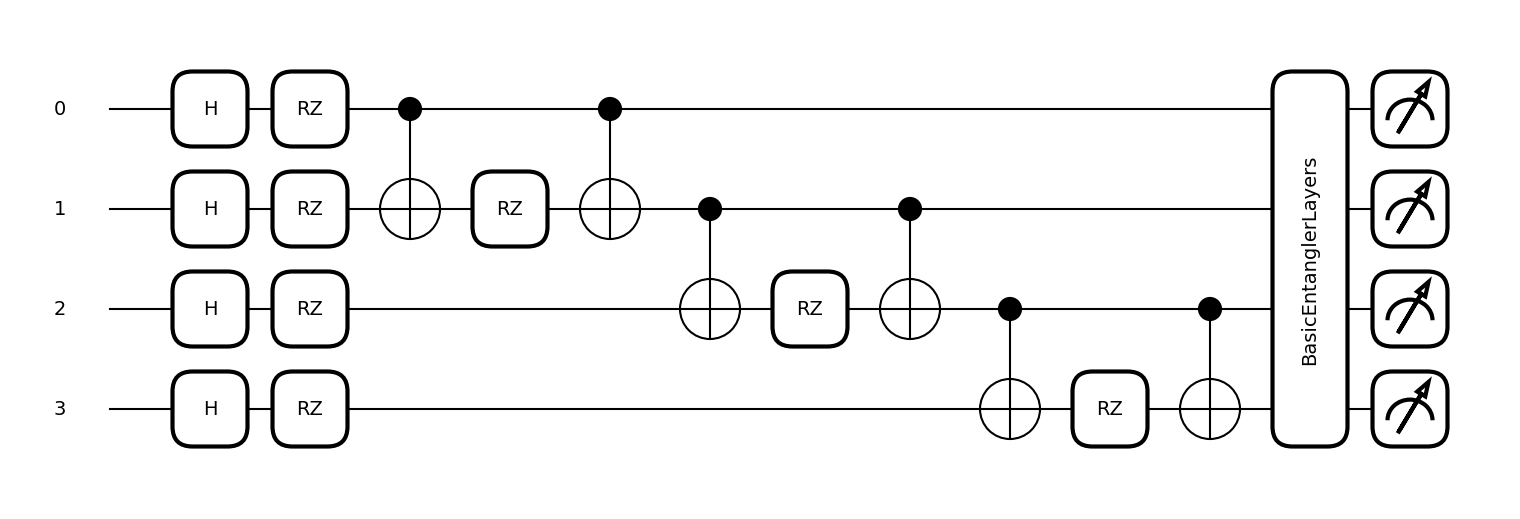

In [ ]:
qml.drawer.use_style("black_white")
# Add dummy inputs and weights for drawing the circuit
inputs = np.zeros(4)
shape = qml.templates.BasicEntanglerLayers.shape(n_layers=4, n_wires=4)
weights = np.random.random(size=shape)
fig, ax = qml.draw_mpl(qnode)(inputs, weights)
plt.show()

**Evaluation**

Epoch   1/50 | Loss: 0.7153
Epoch   5/50 | Loss: 0.6965
Epoch  10/50 | Loss: 0.6932
Epoch  15/50 | Loss: 0.6932
Epoch  20/50 | Loss: 0.6931
Epoch  25/50 | Loss: 0.6933
Epoch  30/50 | Loss: 0.6932
Epoch  35/50 | Loss: 0.6932
Epoch  40/50 | Loss: 0.6932
Epoch  45/50 | Loss: 0.6931
Epoch  50/50 | Loss: 0.6931

=== Quantum Model Performance ===
Train Acc : 0.5044345898004434
Test  Acc : 0.7171052631578947

Classification Report (Test):
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        39
          PD       0.74      0.96      0.84       113

    accuracy                           0.72       152
   macro avg       0.37      0.48      0.42       152
weighted avg       0.55      0.72      0.62       152



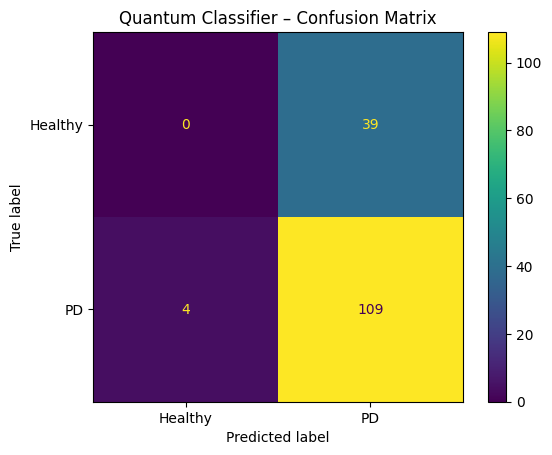

In [ ]:
N_QUBITS = 4                    # qubits = PCA_DIM
LAYERS = 4                      # variational layers
EPOCHS = 50                     # training epochs
BATCH_SIZE = 32
LR = 0.005

# Torch Module wrapping the QNode
# --- Torch Module ---
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(LAYERS, N_QUBITS, 3, dtype=torch.float64))
        # Instead of just bias+scale, use a Linear layer to combine all qubit outputs
        self.fc = nn.Linear(N_QUBITS, 1, dtype=torch.float64)

    def forward(self, x_batch):
        outs = []
        for x in x_batch:
            # Direct call to the zz_feature_map function
            expvals = qnode(x, self.weights)  # shape (N_QUBITS,)
            outs.append(torch.tensor(expvals, dtype=torch.float64))
        outs = torch.stack(outs)  # shape (B, N_QUBITS)
        logits = self.fc(outs)    # shape (B, 1)
        probs = torch.sigmoid(logits)
        return probs.view(-1)

# --- Quantum Circuit ---
dev = qml.device("lightning.qubit", wires=N_QUBITS)

# Removed @qml.qnode(dev) decorator
def zz_feature_map(x):
    # x is a feature vector
    for i in range(N_QUBITS):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    for i in range(N_QUBITS - 1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ((np.pi - x[i]) * (np.pi - x[i+1]), wires=i+1)
        qml.CNOT(wires=[i, i+1])

def variational_block(params):
    qml.StronglyEntanglingLayers(weights=params, wires=range(N_QUBITS))

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    zz_feature_map(inputs)  # Direct call
    variational_block(weights)
    # Measure all qubits
    return [qml.expval(qml.PauliZ(i)) for i in range(N_QUBITS)]


model = QuantumClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.BCELoss()


# Torch Datasets

X_train_t = torch.tensor(X_train_pca, dtype=torch.float64)
y_train_t = torch.tensor(y_train_balanced, dtype=torch.float64)
X_test_t  = torch.tensor(X_test_pca, dtype=torch.float64)
y_test_t  = torch.tensor(y_test, dtype=torch.float64)


train_ds = torch.utils.data.TensorDataset(X_train_t, y_train_t)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)


# Train

for epoch in range(1, EPOCHS+1):
    model.train()
    losses = []
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d}/{EPOCHS} | Loss: {np.mean(losses):.4f}")


# Evaluate

model.eval()
with torch.no_grad():
    p_train = model(X_train_t).numpy()
    p_test  = model(X_test_t).numpy()

yhat_train = (p_train >= 0.5).astype(int)
yhat_test  = (p_test  >= 0.5).astype(int)

print("\n=== Quantum Model Performance ===")
print("Train Acc :", accuracy_score(y_train_balanced, yhat_train))
print("Test  Acc :", accuracy_score(y_test, yhat_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, yhat_test, target_names=["Healthy","PD"]))

# Confusion Matrix
cm = confusion_matrix(y_test, yhat_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","PD"])
disp.plot(values_format="d")
plt.title("Quantum Classifier – Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("\n=== Quantum Model Performance ===")
print("Train Acc :", accuracy_score(y_train_balanced, yhat_train))
print("Test  Acc :", accuracy_score(y_test, yhat_test))
print("Precision:", precision_score(y_test, yhat_test))
print("Recall   :", recall_score(y_test, yhat_test))
print("F1 Score :", f1_score(y_test, yhat_test))



=== Quantum Model Performance ===
Train Acc : 0.5177383592017738
Test  Acc : 0.4473684210526316
Precision: 0.7543859649122807
Recall   : 0.3805309734513274
F1 Score : 0.5058823529411764


# **QSVM**

Accuracy: 0.7312775330396476

=== Quantum Model Performance ===
Train Acc : 0.8177215189873418
Test  Acc : 0.7312775330396476
Precision: 0.8857142857142857
Recall   : 0.7337278106508875
F1 Score : 0.8025889967637541

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.72      0.58        58
           1       0.89      0.73      0.80       169

    accuracy                           0.73       227
   macro avg       0.68      0.73      0.69       227
weighted avg       0.78      0.73      0.75       227

Confusion Matrix:
[[ 42  16]
 [ 45 124]]


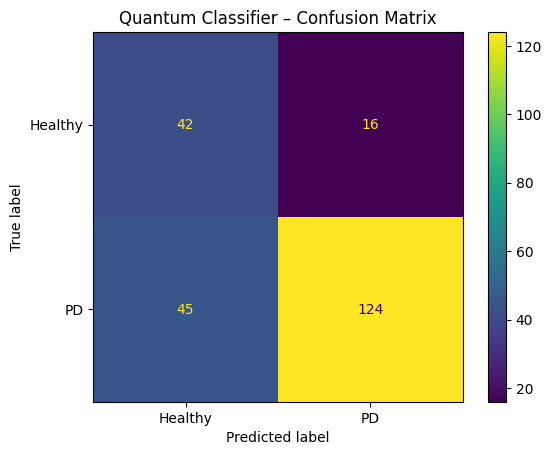

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

df= pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Preprocess: Scale → SelectKBest → PCA
scaler = MinMaxScaler().fit(X_train_balanced)

X_train_s = scaler.transform(X_train_balanced)
X_test_s  = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=100).fit(X_train_s, y_train_balanced)

X_train_k = selector.transform(X_train_s)
X_test_k  = selector.transform(X_test_s)

pca = PCA(n_components=4, random_state=42).fit(X_train_k)
X_train_pca = pca.transform(X_train_k)
X_test_pca  = pca.transform(X_test_k)

# --- Quantum feature map (ZZFeatureMap-like) ---
n_qubits = X_train_pca.shape[1] # Set n_qubits to the number of PCA components
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev)
def feature_map(x):
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ((np.pi - x[i]) * (np.pi - x[i+1]), wires=i+1)
        qml.CNOT(wires=[i, i+1])
    return qml.state()

def kernel(x1, x2):
    """Quantum kernel: squared overlap between states"""
    state1 = feature_map(x1)
    state2 = feature_map(x2)
    return np.abs(np.dot(np.conj(state1), state2))**2

def compute_kernel_matrix(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            K[i, j] = kernel(x1, x2)
    return K

# --- Compute kernel matrices ---
K_train = compute_kernel_matrix(X_train_pca, X_train_pca)
K_test = compute_kernel_matrix(X_test_pca, X_train_pca)

# --- Train SVM with precomputed kernel ---
clf = SVC(kernel="precomputed")
clf.fit(K_train, y_train_balanced) # Fit with balanced training labels

# --- Predictions ---
y_pred = clf.predict(K_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n=== Quantum Model Performance ===")
print("Train Acc :", accuracy_score(y_train_balanced, clf.predict(K_train)))
print("Test  Acc :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)


print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","PD"])
disp.plot(values_format="d")
plt.title("Quantum Classifier – Confusion Matrix")
plt.show()

**QSVM : PauliFeatureMap**

Accuracy: 0.7665198237885462

=== Quantum Model Performance ===

--- Training Metrics ---
Train Acc : 0.7924050632911392
Precision (Train): 0.7730496453900709
Recall    (Train): 0.8278481012658228
F1 Score  (Train): 0.7995110024449877

--- Test Metrics ---
Test  Acc : 0.7665198237885462
Precision: 0.8717948717948718
Recall   : 0.8047337278106509
F1 Score : 0.8369230769230769

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       395
           1       0.77      0.83      0.80       395

    accuracy                           0.79       790
   macro avg       0.79      0.79      0.79       790
weighted avg       0.79      0.79      0.79       790


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.54      0.66      0.59        58
           1       0.87      0.80      0.84       169

    accuracy                           0.77       227
   macro avg

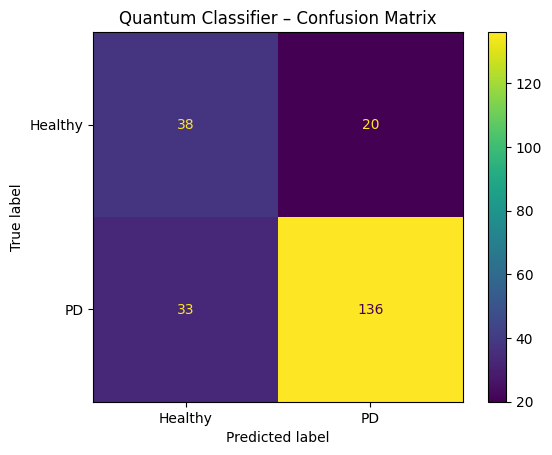

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

df= pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Preprocess: Scale → SelectKBest → PCA
scaler = MinMaxScaler().fit(X_train_balanced)

X_train_s = scaler.transform(X_train_balanced)
X_test_s  = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=100).fit(X_train_s, y_train_balanced)

X_train_k = selector.transform(X_train_s)
X_test_k  = selector.transform(X_test_s)

pca = PCA(n_components=4, random_state=42).fit(X_train_k)
X_train_pca = pca.transform(X_train_k)
X_test_pca  = pca.transform(X_test_k)

# --- Quantum feature map (ZZFeatureMap-like) ---
n_qubits = X_train_pca.shape[1] # Set n_qubits to the number of PCA components
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev)
def feature_map(x):
    for i in range(len(x)):
        qml.Hadamard(wires=i)
        qml.RX(x[i], wires=i)
        qml.RZ(x[i], wires=i)
    return qml.state()

def kernel(x1, x2):
    """Quantum kernel: squared overlap between states"""
    state1 = feature_map(x1)
    state2 = feature_map(x2)
    return np.abs(np.dot(np.conj(state1), state2))**2

def compute_kernel_matrix(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            K[i, j] = kernel(x1, x2)
    return K

# --- Compute kernel matrices ---
K_train = compute_kernel_matrix(X_train_pca, X_train_pca)
K_test = compute_kernel_matrix(X_test_pca, X_train_pca)

# --- Train SVM with precomputed kernel ---
clf = SVC(kernel="precomputed")
clf.fit(K_train, y_train_balanced) # Fit with balanced training labels

# --- Predictions ---
y_pred_train = clf.predict(K_train)
y_pred = clf.predict(K_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n=== Quantum Model Performance ===")

# ---- Training metrics ----
print("\n--- Training Metrics ---")
print("Train Acc :", accuracy_score(y_train_balanced, clf.predict(K_train)))
print("Precision (Train):", precision_score(y_train_balanced, y_pred_train))
print("Recall    (Train):", recall_score(y_train_balanced, y_pred_train))
print("F1 Score  (Train):", f1_score(y_train_balanced, y_pred_train))

print("\n--- Test Metrics ---")
print("Test  Acc :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Full classification reports
print("\nClassification Report (Train):\n", classification_report(y_train_balanced, y_pred_train))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","PD"])
disp.plot(values_format="d")
plt.title("Quantum Classifier – Confusion Matrix")
plt.show()

**QSVM : PauliFeatureMap with Full Entanglement**

Accuracy: 0.762114537444934

=== Quantum Model Performance ===

--- Training Metrics ---
Train Acc : 0.7759493670886076
Precision (Train): 0.7595238095238095
Recall    (Train): 0.8075949367088607
F1 Score  (Train): 0.7828220858895706

--- Test Metrics ---
Test  Acc : 0.762114537444934
Precision: 0.8662420382165605
Recall   : 0.8047337278106509
F1 Score : 0.8343558282208589

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       395
           1       0.76      0.81      0.78       395

    accuracy                           0.78       790
   macro avg       0.78      0.78      0.78       790
weighted avg       0.78      0.78      0.78       790


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        58
           1       0.87      0.80      0.83       169

    accuracy                           0.76       227
   macro avg  

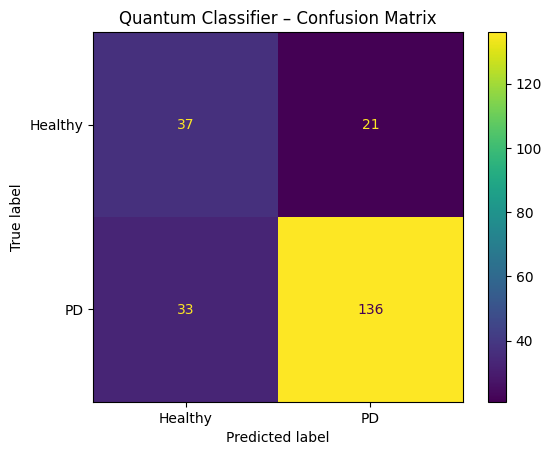

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

df= pd.read_csv("pd_speech_features.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Preprocess: Scale → SelectKBest → PCA
scaler = MinMaxScaler().fit(X_train_balanced)

X_train_s = scaler.transform(X_train_balanced)
X_test_s  = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=100).fit(X_train_s, y_train_balanced)

X_train_k = selector.transform(X_train_s)
X_test_k  = selector.transform(X_test_s)

pca = PCA(n_components=4, random_state=42).fit(X_train_k)
X_train_pca = pca.transform(X_train_k)
X_test_pca  = pca.transform(X_test_k)

# --- Quantum feature map (ZZFeatureMap-like) ---
n_qubits = X_train_pca.shape[1] # Set n_qubits to the number of PCA components
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev)
def feature_map_encoding(x):
    n_qubits = len(x)
    # Local feature encoding
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RX(x[i], wires=i)
        qml.RZ(x[i], wires=i)

    # Fully entangling layer (ring of CNOTs)
    for i in range(n_qubits):
        qml.CNOT(wires=[i, (i + 1) % n_qubits])
    return qml.state()

def kernel(x1, x2):
    """Quantum kernel: squared overlap between states"""
    state1 = feature_map(x1)
    state2 = feature_map(x2)
    return np.abs(np.dot(np.conj(state1), state2))**2

def compute_kernel_matrix(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            K[i, j] = kernel(x1, x2)
    return K

# --- Compute kernel matrices ---
K_train = compute_kernel_matrix(X_train_pca, X_train_pca)
K_test = compute_kernel_matrix(X_test_pca, X_train_pca)

# --- Train SVM with precomputed kernel ---
clf = SVC(kernel="precomputed")
clf.fit(K_train, y_train_balanced) # Fit with balanced training labels

# --- Predictions ---
y_pred_train = clf.predict(K_train)
y_pred = clf.predict(K_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n=== Quantum Model Performance ===")

# ---- Training metrics ----
print("\n--- Training Metrics ---")
print("Train Acc :", accuracy_score(y_train_balanced, clf.predict(K_train)))
print("Precision (Train):", precision_score(y_train_balanced, y_pred_train))
print("Recall    (Train):", recall_score(y_train_balanced, y_pred_train))
print("F1 Score  (Train):", f1_score(y_train_balanced, y_pred_train))

print("\n--- Test Metrics ---")
print("Test  Acc :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Full classification reports
print("\nClassification Report (Train):\n", classification_report(y_train_balanced, y_pred_train))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy","PD"])
disp.plot(values_format="d")
plt.title("Quantum Classifier – Confusion Matrix")
plt.show()

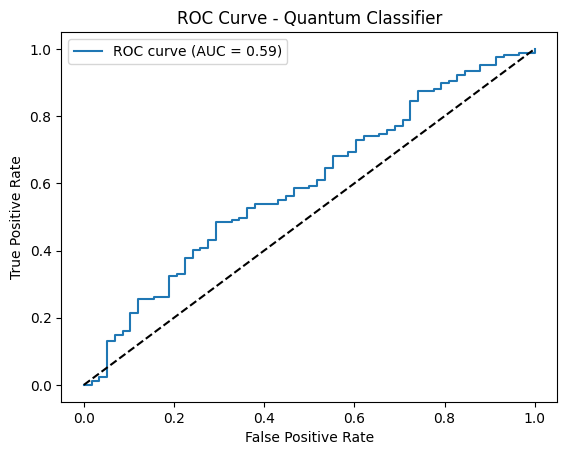

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_probs = model(torch.tensor(X_test_pca, dtype=torch.float64)).numpy() # Use the model's forward pass to get probabilities

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Quantum Classifier")
plt.legend()
plt.show()